In [218]:
import pandas as pd
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from imageio import imread
%matplotlib inline

In [220]:
df = pd.read_csv('metadados.csv', sep=';')

In [221]:
df.head()

,TAMANHO,NOME,OBJETO,TIPO,FOTO,FUNDO,LOCAL,PERIODO,NOME_FINAL
0,2885502,DSCN8206.JPG,CELULAR,1,1,ASSOALHO,INTERNO,DIA,CELULAR_1_1_ASSOALHO_INTERNO_DIA_DSCN8206.JPG
1,3214874,DSCN8663.JPG,CELULAR,1,1,ASSOALHO,INTERNO,NOITE,CELULAR_1_1_ASSOALHO_INTERNO_NOITE_DSCN8663.JPG
2,2866803,DSCN8032.JPG,CELULAR,1,1,BRANCO,EXTERNO,DIA,CELULAR_1_1_BRANCO_EXTERNO_DIA_DSCN8032.JPG
3,3029514,DSCN9319.JPG,CELULAR,1,1,BRANCO,EXTERNO,NOITE,CELULAR_1_1_BRANCO_EXTERNO_NOITE_DSCN9319.JPG
4,2994309,DSCN8493.JPG,CELULAR,1,1,BRANCO,INTERNO,DIA,CELULAR_1_1_BRANCO_INTERNO_DIA_DSCN8493.JPG


# Tabela Sumária de Dados

## Tabela Global

In [222]:
num_classes = len(pd.unique(df['OBJETO']))

In [223]:
num_imagens = len(df)

In [224]:
df['TAMANHO'] = df['TAMANHO'].astype(int)

In [225]:
# calcula o tamanho da base em MB
tamanho = df['TAMANHO'].sum() // (1024*1024)

In [226]:
resolucao = "4320 x 3240"

In [227]:
# cria um dicionário com as informações da tabela
dados = {'Numero_de_classes': [num_classes],
         'Numero_de_imagens': [num_imagens],
         'Tamanho_MB' : [tamanho],
         'Resolucao_imagens' : [resolucao]}

In [228]:
tabela_global = pd.DataFrame(dados, columns = ['Numero_de_classes', 'Numero_de_imagens', 'Tamanho_MB', 'Resolucao_imagens'])

### Tabela

In [229]:
tabela_global

,Numero_de_classes,Numero_de_imagens,Tamanho_MB,Resolucao_imagens
0,10,1656,4997,4320 x 3240


## Tabela por Classe

In [230]:
fundos = 'tapete, branco, assoalho, pedra'
iluminacao = 'interno/dia, interno/noite, externo/dia, externo/noite'

In [231]:
dados_por_classe = {'Classes': ['Livro', 'Colher', 'Faca', 'Tesoura', 'Óculos', 'Prato', 'Celular', 'Garrafa', 'Copo', 'Computador'],
                    'Num_objetos' : [4, 5, 5, 4, 5, 4, 4, 5, 6, 4],
                    'Fundos' : 10*[fundos],
                    'Iluminacao' : 10*[iluminacao],
                    'Num_repeticoes' : [3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
                    'Total_amostras' : [len(df[df['OBJETO'] == 'LIVRO']), len(df[df['OBJETO'] == 'COLHER']), len(df[df['OBJETO'] == 'FACA']), len(df[df['OBJETO'] == 'TESOURA']), len(df[df['OBJETO'] == 'OCULOS']), len(df[df['OBJETO'] == 'PRATO']), len(df[df['OBJETO'] == 'CELULAR']), len(df[df['OBJETO'] == 'GARRAFA']), len(df[df['OBJETO'] == 'COPO']), len(df[df['OBJETO'] == 'LAPTOP'])],}

In [232]:
tabela_por_dados = pd.DataFrame(dados_por_classe, columns = ['Classes', 'Num_objetos', 'Fundos', 'Iluminacao', 'Num_repeticoes', 'Total_amostras'])

In [233]:
tabela_por_dados

,Classes,Num_objetos,Fundos,Iluminacao,Num_repeticoes,Total_amostras
0,Livro,4,"tapete, branco, assoalho, pedra","interno/dia, interno/noite, externo/dia, exter...",3,144
1,Colher,5,"tapete, branco, assoalho, pedra","interno/dia, interno/noite, externo/dia, exter...",3,180
2,Faca,5,"tapete, branco, assoalho, pedra","interno/dia, interno/noite, externo/dia, exter...",3,180
3,Tesoura,4,"tapete, branco, assoalho, pedra","interno/dia, interno/noite, externo/dia, exter...",3,144
4,Óculos,5,"tapete, branco, assoalho, pedra","interno/dia, interno/noite, externo/dia, exter...",3,180
5,Prato,4,"tapete, branco, assoalho, pedra","interno/dia, interno/noite, externo/dia, exter...",3,144
6,Celular,4,"tapete, branco, assoalho, pedra","interno/dia, interno/noite, externo/dia, exter...",3,144
7,Garrafa,5,"tapete, branco, assoalho, pedra","interno/dia, interno/noite, externo/dia, exter...",3,180
8,Copo,6,"tapete, branco, assoalho, pedra","interno/dia, interno/noite, externo/dia, exter...",3,216
9,Computador,4,"tapete, branco, assoalho, pedra","interno/dia, interno/noite, externo/dia, exter...",3,144


# Visualização das imagens

In [234]:
# mostra 6 imagens 
def visualiza_seis_imagens(path, df):
    fig, ax = plt.subplots(2, 3, figsize=(9,6))

    images = []
    for i in range(6):
        a = randint(1, len(df))
        images.append(path + '/' + df['NOME_FINAL'][a])
    
    for i in range(6):
        M = imread(images[i])
        ax[i//3, i%3].imshow(M)
        ax[i//3, i%3].axis('off')

    plt.show()

Path é a varíavel com o caminho até as imagens. Deixei como se as imagens estivessem em um diretório chamado imagens no mesmo diretório do notebook. Se as imagens tiverem em outro caminho, é necessário apenas mudar o caminho até o diretório delas.

In [235]:
path = 'imagens-visao'

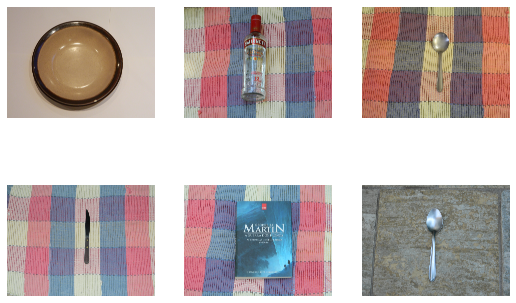

In [237]:
visualiza_seis_imagens(path, df)